# CPD - Nonstationary

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 변수
* k : AR model 의 최대 차수(max_lag)
* Xt: t 시점의 AR model 시계열
* w : AR model의 계수
* m : Xt의 평균
* Cj : j차수 공분산
* ∑: 공분산 행렬(covariance matrix)
* e : 오차
* r : discounting factor

# 논문 시뮬레이션 데이터셋
* Xt := 0.6 * Xt-1 - 0.5 * Xt-2 + e
* change points occur at time x * 1000(x=1,2,3..9)
* change size : x (Δx = x)

In [97]:
k=2
num_timestep = 10000
y = np.zeros(num_timestep)
y[0]=1
y[1]=-2

time_range = np.arange(num_timestep)
coef = [0.6,-0.5]

for t in range(2,num_timestep):
    noise = np.random.randn()
    
    if t % 1000 ==0:
        change_size = t//1000
        y[t] = coef[0]* y[t-1] + coef[1]*y[t-2] + noise + change_size
    else:
        y[t] = coef[0]* y[t-1] + coef[1]*y[t-2] + noise

In [98]:
len(y)

10000

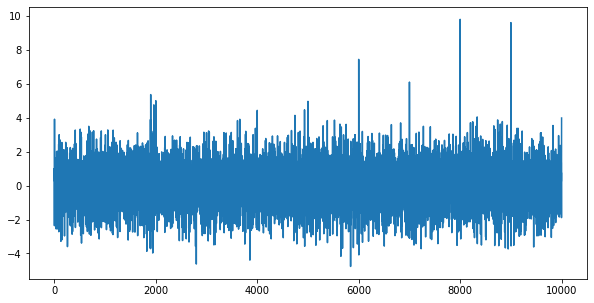

In [99]:
fig, axs = plt.subplots(figsize=(10,5))
plt.plot(time_range, y)

In [81]:
# # 가정
# k= 4

# df = sns.load_dataset("flights")
# data = np.array(df['passengers'])
# data

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

# 기존 데이터
:논문 example AR model data를 구현하여 사용

In [82]:
# 처음 10개 데이터로 시작
t = 20
series = data[:t]
print("시작데이터:", series)

시작데이터: [112 118 132 129 121 135 148 148 136 119 104 118 115 126 141 135 125 149
 170 170]


In [83]:
# 평균
mean = np.mean(series)
mean

132.55

In [84]:
# Calculate the sample autocovariance
autocovariance = []
for lag in range(1, k + 1):
    acov = np.mean((data[lag:] - mean) * (data[:-lag] - mean))
    autocovariance.append(acov)
    
autocovariance

[35491.01928321678, 34591.58911971831, 33642.56952127659, 32851.67964285714]

In [85]:
# Construct the autocovariance matrix
autocov_matrix = np.zeros((k, k))
for i in range(k):
    for j in range(k):
        autocov_matrix[i, j] = autocovariance[np.abs(i - j)]
autocov_matrix

array([[35491.01928322, 34591.58911972, 33642.56952128, 32851.67964286],
       [34591.58911972, 35491.01928322, 34591.58911972, 33642.56952128],
       [33642.56952128, 34591.58911972, 35491.01928322, 34591.58911972],
       [32851.67964286, 33642.56952128, 34591.58911972, 35491.01928322]])

In [86]:
# Solve the system of equations to obtain AR coefficients
# w1,w2,w3.... 
ar_coefficients = np.linalg.solve(autocov_matrix, autocovariance)
ar_coefficients

array([ 1.,  0., -0.,  0.])

In [87]:
ar_coefficients[3]

0.0

In [88]:
import numpy as np

def estimate_ar_parameters(data, p):
    # Calculate the sample mean
    mean = np.mean(data)

    # Calculate the sample autocovariance
    autocovariance = []
    for lag in range(1, p + 1):
        acov = np.mean((data[lag:] - mean) * (data[:-lag] - mean))
        autocovariance.append(acov)

    # Construct the autocovariance matrix
    autocov_matrix = np.zeros((p, p))
    for i in range(p):
        for j in range(p):
            autocov_matrix[i, j] = autocovariance[np.abs(i - j)]

    # Solve the system of equations to obtain AR coefficients
    ar_coefficients = np.linalg.solve(autocov_matrix, autocovariance)

    return ar_coefficients

# Example usage
# data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
order = 4

ar_params = estimate_ar_parameters(series, order)
print("Estimated AR Coefficients:", ar_params)


Estimated AR Coefficients: [ 1.00000000e+00 -1.63952484e-18  1.67240949e-17  1.61317246e-17]


In [89]:
ar_params[2]

1.6724094915909455e-17

In [ ]:
# estimate Covariance Matrix
# C0 : lag 0
C0 = np.mean((data[lag:]-mean)*(data[:lag]-mean))


# Parameter update

In [ ]:
new_x = data[t+1]
# update mean
r = 0.3 
mean = (1-r)*mean + r* new_x

In [ ]:
# update autocovariance
new_autocovariance = []
for lag in range(1,k+1):
    
autocovariance = (1-r) * autocovariance + 

In [ ]:
# 현재 확률밀도함수
# Create a multivariate normal distribution object
mv_normal = multivariate_normal(mean=mean_vector, cov=covariance_matrix, allow_singular=True)